# Graph Algorithms

## Necessary modules

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import random
import numpy as np

import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from community import community_louvain
from sklearn import cluster

## Data preparation and exploration 

In [9]:
 G= nx.read_edgelist('graph-assignment.txt', nodetype=str,
                     data=[('weight', int)], create_using=nx.Graph())

In [10]:
G.nodes

NodeView(('0', '1', '8', '2', '6', '7', '3', '5', '4'))

In [11]:
len(G.nodes)

9

In [12]:
for n, edge in enumerate(G.edges):
    print("Edge : {0}, {1}".format(edge, G.get_edge_data(*edge)))

Edge : ('0', '1'), {'weight': 4}
Edge : ('0', '8'), {'weight': 8}
Edge : ('1', '8'), {'weight': 11}
Edge : ('1', '2'), {'weight': 8}
Edge : ('8', '6'), {'weight': 7}
Edge : ('8', '7'), {'weight': 1}
Edge : ('2', '3'), {'weight': 7}
Edge : ('2', '5'), {'weight': 5}
Edge : ('2', '6'), {'weight': 2}
Edge : ('6', '7'), {'weight': 6}
Edge : ('7', '5'), {'weight': 6}
Edge : ('3', '4'), {'weight': 9}
Edge : ('3', '5'), {'weight': 14}
Edge : ('5', '4'), {'weight': 10}


### Set position of noeds

In [13]:
pos = {'0':[-1,0], '1':[-0.5,0.5], '8':[-0.5,-0.5],
       '2':[0,0.5], '6':[0,0], '7':[0,-0.5],
       '3':[0.5,0.5], '4':[1,0], '5':[0.5,-0.5]}

## Coloring algorithm 
No two adjacent nodes have same colors

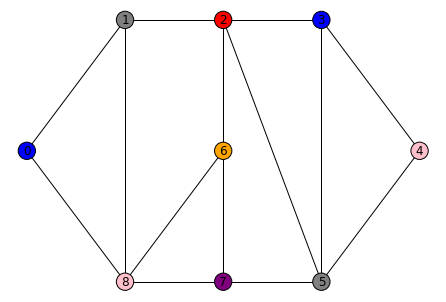

In [14]:
colors = [
    "blue", "gray", "pink",
    "red", "orange", "purple",
    "blue", "gray", "pink",
    "snow", "wheat", "lime",
    "crimson", "maroon",]

#return dict - keys:nodes , values:corrersponding colors
d = nx.coloring.equitable_color(G, num_colors=10) 

node_colors = []
for i in d.keys():
    node_colors.append(colors[d[i]])

nx.draw(G, pos, node_color=node_colors, with_labels=True)

ax= plt.gca()
ax.collections[0].set_edgecolor("#000000") #set the black node border

plt.show()

## Louvain modularity algorithim

In [15]:
#Compute the partition of the graph nodes
communities = community_louvain.best_partition(G) #return as dictionary 
communities #key:nodes, value: community/partition label

{'0': 1, '1': 1, '8': 1, '2': 2, '6': 0, '7': 0, '3': 2, '5': 2, '4': 2}

Unique community labels: {0, 1, 2}


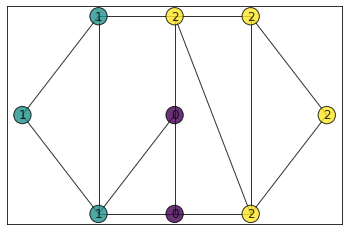

In [16]:
print("Unique community labels:",set(communities.values()))

cmap = cm.get_cmap('viridis', max(communities.values()) + 1) #from community_louvain documentation

nx.draw_networkx(G, pos, 
                 nodelist=communities.keys(), 
                 cmap=cmap,
                 node_color=list(communities.values()), 
                 alpha=0.8, 
                 with_labels=True, 
                 labels=communities)

ax= plt.gca()
ax.collections[0].set_edgecolor("#000000") #set the black node border

plt.show()

## Girvan-Newman algorithm

In [17]:
#find communities in a graph at different level of algorithm
# iteratively removing the graph’s edges 
# based on the edge betweenness centrality value
communities = girvan_newman(G) 
for community in communities: 
    print(community)

({'6', '1', '0', '7', '8'}, {'2', '3', '4', '5'})
({'1', '0'}, {'6', '8', '7'}, {'2', '3', '4', '5'})
({'1', '0'}, {'6', '8', '7'}, {'2'}, {'3', '4', '5'})
({'0'}, {'1'}, {'6', '8', '7'}, {'2'}, {'3', '4', '5'})
({'0'}, {'1'}, {'8'}, {'2'}, {'6', '7'}, {'3', '4', '5'})
({'0'}, {'1'}, {'8'}, {'2'}, {'6'}, {'7'}, {'3', '4', '5'})
({'0'}, {'1'}, {'8'}, {'2'}, {'6'}, {'7'}, {'3'}, {'4', '5'})
({'0'}, {'1'}, {'8'}, {'2'}, {'6'}, {'7'}, {'3'}, {'5'}, {'4'})


In [18]:
communities = girvan_newman(G) 
node_groups = []
# Get communities in 1st tuple  
for community in next(communities):
    node_groups.append(list(community)) # append the communities in 1st tuple
    
node_groups #First level

[['6', '1', '0', '7', '8'], ['2', '3', '4', '5']]

Unique community labels: {0, 1}


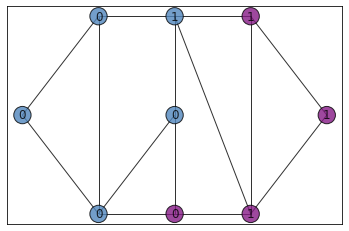

In [19]:
# get color of each community - tuples of rgb 
# one community one color 
def get_color(i, r_off=1, g_off=1, b_off=1):
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 4) % n) / (n-1)
    g = low + span * (((i + g_off) * 8) % n) / (n-1)
    b = low + span * (((i + b_off) * 12) % n) / (n-1)
    return (r, g, b)
  
node_colors = []
community_label={}
for ng in range(len(node_groups)): #`ng` will return number of communities 
    for node in G:
        if node in node_groups[ng]:
            node_colors.append(get_color(ng))  
            community_label[node] = ng
print("Unique community labels:", set(community_label.values()))         

nx.draw_networkx(G, pos, 
                 node_color=node_colors, 
                 alpha=0.8, 
                 with_labels=True, 
                 labels=community_label)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000") #set the black node border

plt.show()

## K-means clustering 

In [20]:
def graph_to_edge_matrix(G):
    # Initialize edge matrix with zeros
    edge_matrix = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_matrix[int(node)][int(neighbor)] = 1 #put a 1 for the neighbors 
        edge_matrix[int(node)][int(node)] = 1 #put a 1 for itself (diagonal 1's)

    return edge_matrix

# Convert a networkx graph into an edge matrix
edge_matrix = graph_to_edge_matrix(G)
print("Edge matrix {}:".format(edge_matrix.shape))
print(edge_matrix)

# K-means clustering - this one is not very suited for membank dataset
model = cluster.KMeans(n_clusters=2, n_init=1000)
model.fit(edge_matrix)
clustering_labels = list(model.labels_) #0s and 1s (two clusters)

clustering_label_dict={}
for node, label in zip(G.nodes, clustering_labels):
    clustering_label_dict[node]=label

Edge matrix (9, 9):
[[1 1 0 0 0 0 0 0 1]
 [1 1 1 0 0 0 0 0 1]
 [0 1 1 1 0 1 1 0 0]
 [0 0 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 1 1 1 1 0 1 0]
 [0 0 1 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1 1]
 [1 1 0 0 0 0 1 1 1]]


unique clustering label: {0, 1}


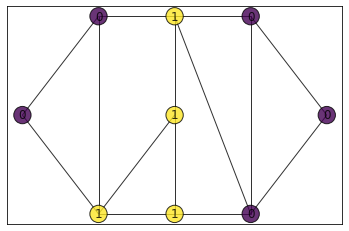

In [21]:
print("unique clustering label:", set(clustering_labels))

cmap = cm.get_cmap('viridis', max(clustering_labels) + 1)

nx.draw_networkx(G, pos, 
                 cmap=cmap,
                 node_color=clustering_labels, 
                 alpha=0.8, 
                 with_labels=True, 
                 labels=clustering_label_dict)

ax= plt.gca()
ax.collections[0].set_edgecolor("#000000") #set the black node border

plt.show()